# **Task:**
### **Regression type:** Polynomial
### **Optimizer:** Gradient descent with momentum
### **Loss:** MSE+L1-regularization
### **Datasets:**
(a)
```
X_data=np.linspace(-1,1,100)
num_coef=8
coef=[1,20,3,4,6,7,300,2]
y_data=0
for i in range(num_coef):
    y_data+=coef[i]*np.power(X_data,i)
    y_data+=np.random.randn(*X_data.shape)*20.5
```
(b)
```
sklearn.datasets.make_friedman3
```

# **Importing all necessary libraries**

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_friedman3

# **Setting random seed for reproducibility of results**

In [2]:
tf.random.set_seed(seed=123456)
np.random.seed(seed=123456)

# **Setting all the global variables**

In [3]:
n_epochs=100

# **Defining class for a model**

In [4]:
class Polynomial_Regression(tf.keras.Model):
  def __init__(self,input_dim,power,std):
    super(Polynomial_Regression,self).__init__()
    self.input_dim=input_dim
    self.power=power
    self.std=std
    self.W=tf.Variable(initial_value=tf.random.normal(mean=0.0,stddev=self.std,shape=[self.power*self.input_dim,1]),name="weights")
    self.b=tf.Variable(initial_value=tf.random.normal(mean=0.0,stddev=self.std,shape=[1]),name="bias")
  def call(self,x):
    lin_comb=0.0
    for i in range(self.input_dim):
      for j in range(1,self.power+1):
        if self.input_dim>1:
          lin_comb+=tf.multiply(self.W[i*self.power+j-1],tf.pow(x[:,i],j))
        elif self.input_dim==1:
          lin_comb+=tf.multiply(self.W[i*self.power+j-1],tf.pow(x,j))
    y_pred=lin_comb+self.b
    return y_pred

# **Defining function for model`s training**

In [5]:
def train(model,n_epochs,X_train,y_train,X_val,y_val,lmbd,optimizer):
  hist={'train_loss':[],'val_loss':[]}
  print('Learning process:')
  for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
      train_loss=tf.reduce_mean(tf.square(y_train-model(X_train)))+lmbd*tf.reduce_sum(tf.abs(model.W))+lmbd*tf.reduce_sum(tf.abs(model.b))
    hist['train_loss'].append(train_loss)
    val_loss=tf.reduce_mean(tf.square(y_val-model(X_val)))+lmbd*tf.reduce_sum(tf.abs(model.W))+lmbd*tf.reduce_sum(tf.abs(model.b))
    hist['val_loss'].append(val_loss)
    gradients=tape.gradient(train_loss,[model.W,model.b])
    optimizer.apply_gradients(zip(gradients,[model.W,model.b]))
    if epoch%10==0:
      print(f'Epoch {epoch}: train_loss={train_loss}, val_loss={val_loss}')
  train_loss=tf.reduce_mean(tf.square(y_train-model(X_train)))+lmbd*tf.reduce_sum(tf.abs(model.W))+lmbd*tf.reduce_sum(tf.abs(model.b))
  hist['train_loss'].append(train_loss)
  val_loss=tf.reduce_mean(tf.square(y_val-model(X_val)))+lmbd*tf.reduce_sum(tf.abs(model.W))+lmbd*tf.reduce_sum(tf.abs(model.b))
  hist['val_loss'].append(val_loss)
  print(f'Final: train_loss={hist["train_loss"][-1]}, val_loss={hist["val_loss"][-1]},\n')
  return hist,model

# **First dataset**

## **Preparing, visualizing first dataset and splitting it on train and validation samples**

In [6]:
X_data_1=np.linspace(-1,1,100)
num_coef=8
coef=[1,20,3,4,6,7,300,2]
y_data_1=0
for i in range(num_coef) :
  y_data_1+=coef[i]*np.power(X_data_1,i)
  y_data_1+=np.random.randn(*X_data_1.shape)*20.5
print(X_data_1[:5])
print(y_data_1[:5])
print(X_data_1.shape)
print(y_data_1.shape)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192]
[253.18639804 234.31453572  81.59784824 233.38308398 166.88651783]
(100,)
(100,)


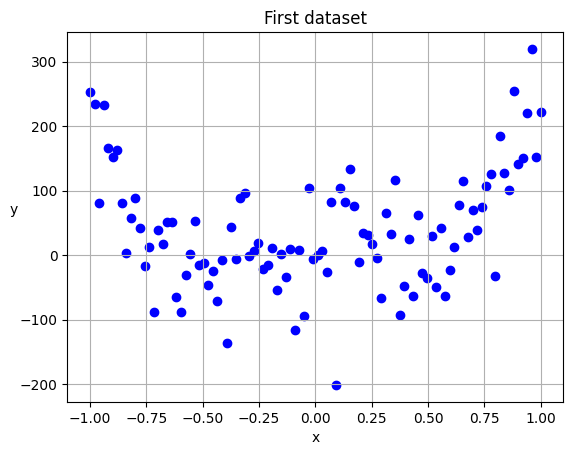

In [7]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y',rotation=360)
ax.set_title('First dataset')
ax.scatter(X_data_1,y_data_1,color='b')
plt.show()

In [8]:
X_train,X_val,y_train,y_val=train_test_split(X_data_1,y_data_1,train_size=0.8,random_state=1)
print(X_train.shape)
print(y_train.shape)

(80,)
(80,)


## **Defining parameters of the model (number of factors, highest power in polynomial regression and standard deviation of a normal distribution for parameter`s initialization)**

In [9]:
n_dim=1
power=7
std=20.0

## **Analysing model`s performance for different values of learning_rate and regularization parameter, with main purpose of choosing the best values**

In [10]:
lr_values=[1e-1,1e-2,1e-3]
lmbd_values=[1e-1,1e-2,1e-3,0.0]
for lr in lr_values:
  for lmbd in lmbd_values:
    model=Polynomial_Regression(n_dim,power,std)
    print(f'learning_rate={lr}, lambda={lmbd}')
    hist,model=train(model,n_epochs,X_train,y_train,X_val,y_val,lmbd,tf.keras.optimizers.legacy.SGD(learning_rate=lr,momentum=0.5))
    mse=tf.reduce_mean(tf.square(y_val-model(X_val)))
    print(f'Validation MSE: {mse.numpy()}\n')

learning_rate=0.1, lambda=0.1
Learning process:
Epoch 0: train_loss=17023.578125, val_loss=12642.1962890625
Epoch 10: train_loss=4919.044921875, val_loss=3032.998779296875
Epoch 20: train_loss=4259.69091796875, val_loss=3136.173828125
Epoch 30: train_loss=4130.33740234375, val_loss=3284.439208984375
Epoch 40: train_loss=4087.655029296875, val_loss=3364.962158203125
Epoch 50: train_loss=4062.094482421875, val_loss=3405.885986328125
Epoch 60: train_loss=4041.848876953125, val_loss=3427.43408203125
Epoch 70: train_loss=4024.393310546875, val_loss=3439.442626953125
Epoch 80: train_loss=4008.874267578125, val_loss=3446.342041015625
Epoch 90: train_loss=3994.848876953125, val_loss=3450.201416015625
Final: train_loss=3982.038330078125, val_loss=3452.087158203125,

Validation MSE: 3416.249267578125

learning_rate=0.1, lambda=0.01
Learning process:
Epoch 0: train_loss=17817.107421875, val_loss=11411.7001953125
Epoch 10: train_loss=5376.18115234375, val_loss=3202.50341796875
Epoch 20: train_loss

## **Choosing the best values of mentioned parameters and training model with them**

In [11]:
lr=1e-2
lmbd=0.0

In [12]:
model=Polynomial_Regression(n_dim,power,std)
print('Starting parameters:')
print('W=',model.W.numpy().reshape(model.input_dim,model.power))
print('b=',model.b.numpy(),'\n')
hist,model=train(model,n_epochs,X_train,y_train,X_val,y_val,lmbd,tf.keras.optimizers.legacy.SGD(learning_rate=lr,momentum=0.5))
print('Final parameters:')
print('W=',model.W.numpy().reshape(model.input_dim,model.power))
print('b=',model.b.numpy())

Starting parameters:
W= [[-7.3245053 -4.477298  -0.6654941  4.114524   5.496517   2.4777887
  23.818344 ]]
b= [-0.20574726] 

Learning process:
Epoch 0: train_loss=10676.1357421875, val_loss=6804.10791015625
Epoch 10: train_loss=8496.7685546875, val_loss=5046.76513671875
Epoch 20: train_loss=7324.5263671875, val_loss=4137.2646484375
Epoch 30: train_loss=6680.1220703125, val_loss=3682.8515625
Epoch 40: train_loss=6250.6787109375, val_loss=3420.298095703125
Epoch 50: train_loss=5925.21923828125, val_loss=3251.93994140625
Epoch 60: train_loss=5661.48193359375, val_loss=3137.725830078125
Epoch 70: train_loss=5441.0859375, val_loss=3058.67138671875
Epoch 80: train_loss=5254.3623046875, val_loss=3004.25
Epoch 90: train_loss=5095.14208984375, val_loss=2967.82373046875
Final: train_loss=4958.90087890625, val_loss=2944.842529296875,

Final parameters:
W= [[ 8.525017  44.011353   1.0402006 56.272778   2.5921133 52.179142
  18.938513 ]]
b= [6.196987]


## **Performing saving/loading of model`s architecture and parameters**

In [13]:
model_1_json=model.to_json()
with open('model_1.json','w') as json_file:
    json_file.write(model_1_json)
model.save_weights('model_weights_1.h5')
with open('/content/model_1.json','r') as json_file:
    loaded_model_1_json=json_file.read()
with tf.keras.utils.custom_object_scope({'Polynomial_Regression': Polynomial_Regression}):
    loaded_model_1=tf.keras.models.model_from_json(loaded_model_1_json)
loaded_model_1(X_data_1[:1])
loaded_model_1.load_weights('/content/model_weights_1.h5')

## **Visualizing data with regression line and loss curve**

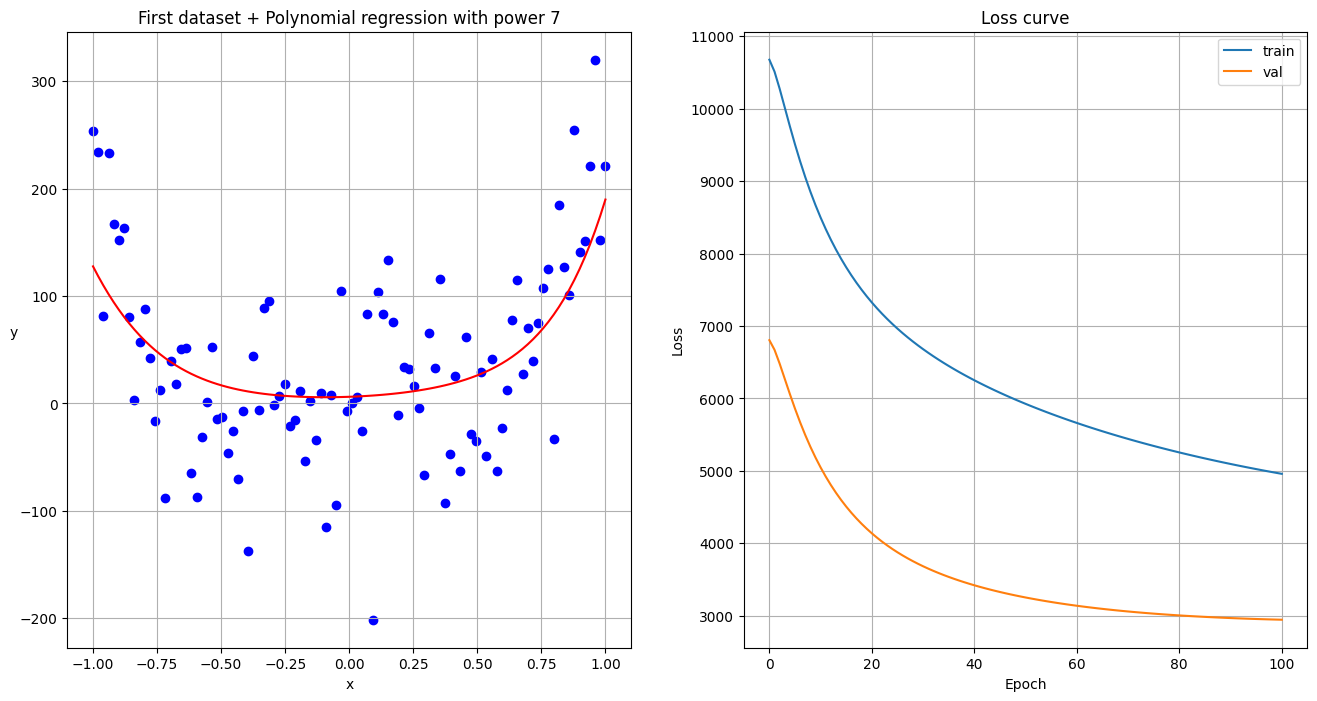

In [14]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y',rotation=360)
ax.set_title(f'First dataset + Polynomial regression with power {model.power}')
pred=np.zeros(shape=y_data_1.shape)
for i in range(1,loaded_model_1.power+1):
  pred+=loaded_model_1.W.numpy()[i-1]*X_data_1**i
pred+=loaded_model_1.b.numpy()
ax.scatter(X_data_1,y_data_1,color='b')
ax.plot(X_data_1,pred,color='r')
ax=fig.add_subplot(1,2,2)
ax.grid()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss curve')
ax.plot(hist['train_loss'],label='train')
ax.plot(hist['val_loss'],label='val')
ax.legend()
plt.show()

# **Second dataset**

## **Uploading second dataset**

In [15]:
X_data_2,y_data_2=make_friedman3(random_state=1)
print(X_data_2.shape)
print(y_data_2.shape)
print(X_data_2[:5])
print(y_data_2[:5])

(100, 4)
(100,)
[[4.17022005e+01 1.30240610e+03 1.14374817e-04 4.02332573e+00]
 [1.46755891e+01 2.76510637e+02 1.86260211e-01 4.45560727e+00]
 [3.96767474e+01 1.00588991e+03 4.19194514e-01 7.85219500e+00]
 [2.04452250e+01 1.56018110e+03 2.73875932e-02 7.70467510e+00]
 [4.17304802e+01 1.03835515e+03 1.40386939e-01 2.98101489e+00]]
[0.00356746 1.29320233 1.47697679 1.12451239 1.29197939]


## **Visualizing second dataset**

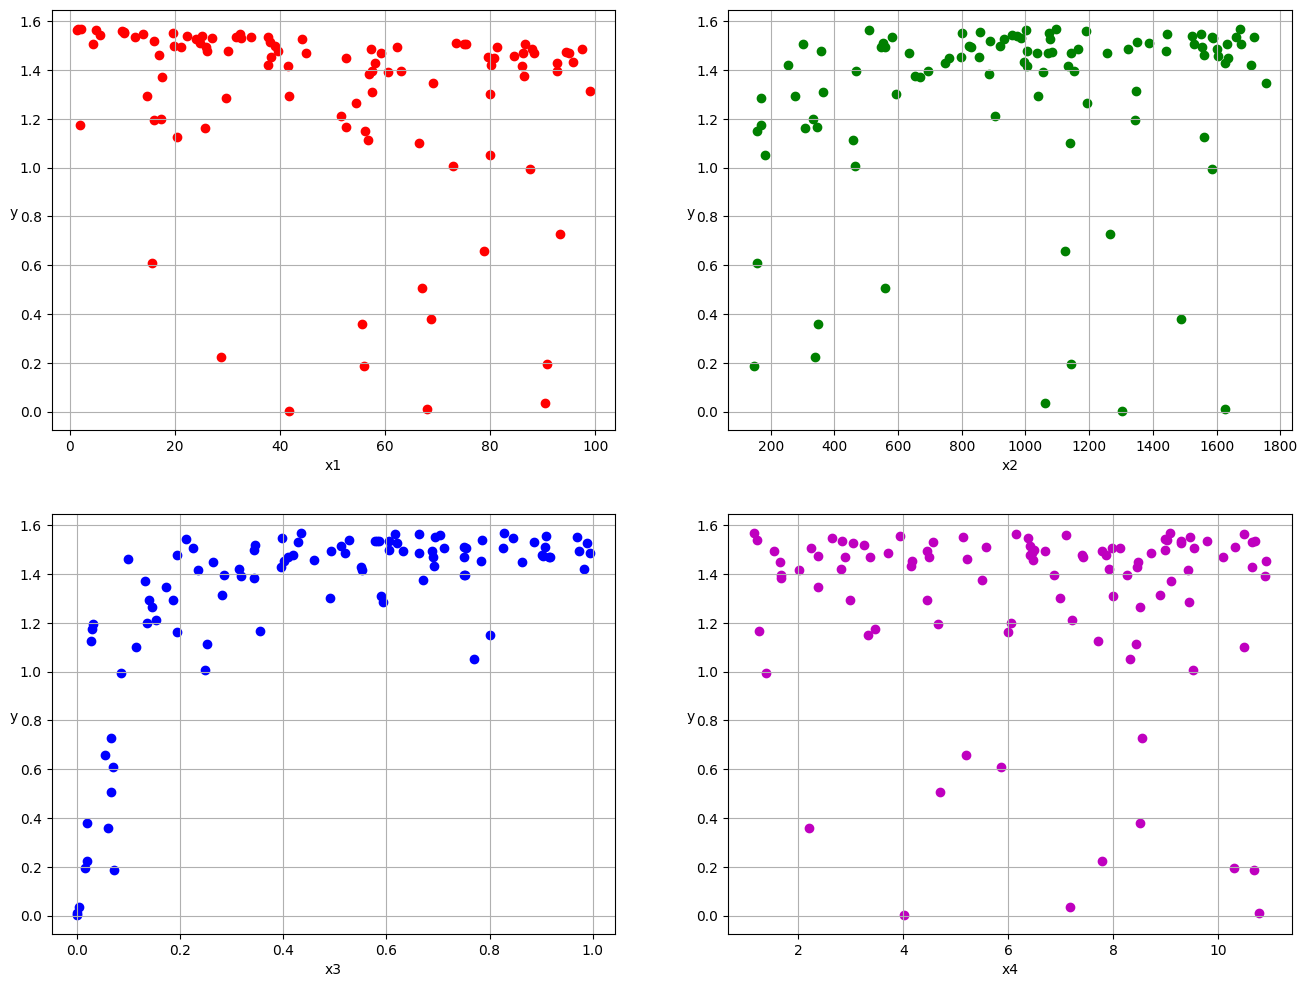

In [16]:
n_dim=X_data_2.shape[1]
colors=['r','g','b','m']
fig=plt.figure(figsize=(16,12))
for i in range(n_dim):
  if n_dim%2==1:
    ax=fig.add_subplot(2,n_dim//2+1,i+1)
  else:
    ax=fig.add_subplot(2,n_dim//2,i+1)
  ax.grid()
  ax.set_xlabel(f'x{i+1}')
  ax.set_ylabel('y',rotation=360)
  ax.scatter(X_data_2[:,i],y_data_2,color=colors[i])
plt.show()

## **Scaling data, using MinMaxScaler, visualising scaled data and splitting it on train and validation sample**

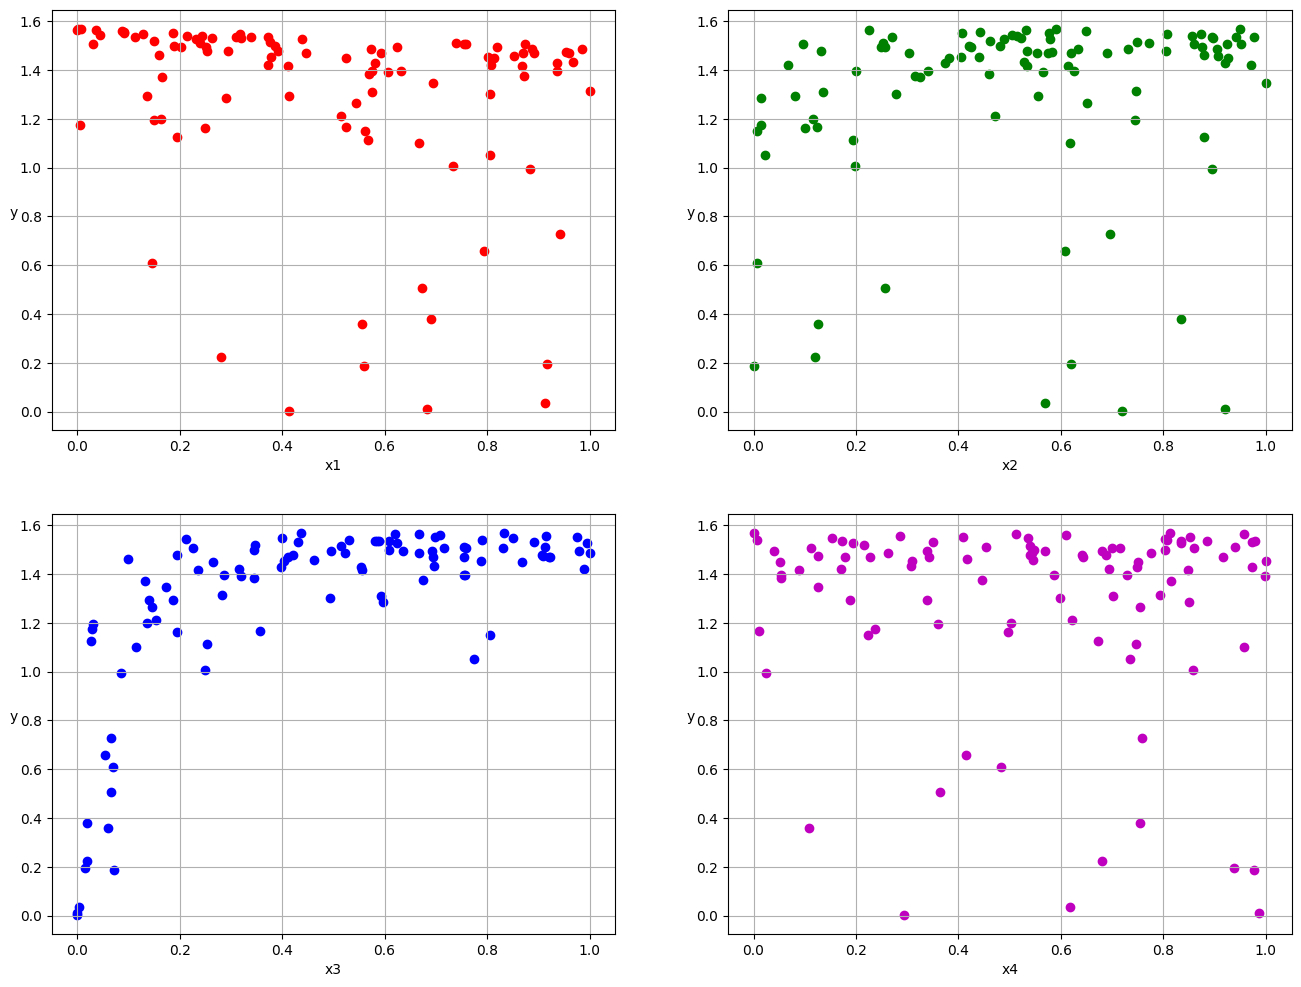

In [17]:
X_data_2=MinMaxScaler().fit_transform(X_data_2)
fig=plt.figure(figsize=(16,12))
for i in range(n_dim):
  if n_dim%2==1:
    ax=fig.add_subplot(2,n_dim//2+1,i+1)
  else:
    ax=fig.add_subplot(2,n_dim//2,i+1)
  ax.grid()
  ax.set_xlabel(f'x{i+1}')
  ax.set_ylabel('y',rotation=360)
  ax.scatter(X_data_2[:,i],y_data_2,color=colors[i])
plt.show()

In [18]:
X_train,X_val,y_train,y_val=train_test_split(X_data_2,y_data_2,train_size=0.8,random_state=1)
print(X_train.shape)
print(y_train.shape)

(80, 4)
(80,)


## **Defining parameters of the model (number of factors, highest power in polynomial regression and standard deviation of a normal distribution for parameter`s initialization)**

In [19]:
n_dim=4
std=1.0
power=3

## **Analysing model`s performance for different values of learning_rate and regularization parameter, with main purpose of choosing the best values**

In [20]:
lr_values=[1e-1,1e-2,1e-3]
lmbd_values=[1e-1,1e-2,1e-3,0.0]
for lr in lr_values:
  for lmbd in lmbd_values:
    model=Polynomial_Regression(n_dim,power,std)
    print(f'learning_rate={lr}, lambda={lmbd}')
    hist,model=train(model,n_epochs,X_train,y_train,X_val,y_val,lmbd,tf.keras.optimizers.legacy.SGD(learning_rate=lr,momentum=0.5))
    mse=tf.reduce_mean(tf.square(y_val-model(X_val)))
    print(f'Validation MSE: {mse.numpy()}\n')

learning_rate=0.1, lambda=0.1
Learning process:
Epoch 0: train_loss=2.2702815532684326, val_loss=2.4502954483032227
Epoch 10: train_loss=1.0379794836044312, val_loss=1.139601469039917
Epoch 20: train_loss=0.775148332118988, val_loss=0.8243743777275085
Epoch 30: train_loss=0.5836573243141174, val_loss=0.6047664284706116
Epoch 40: train_loss=0.43428707122802734, val_loss=0.4454088807106018
Epoch 50: train_loss=0.3414967656135559, val_loss=0.3390870690345764
Epoch 60: train_loss=0.2949410378932953, val_loss=0.2788298428058624
Epoch 70: train_loss=0.27789729833602905, val_loss=0.2540552020072937
Epoch 80: train_loss=0.27361223101615906, val_loss=0.2450396716594696
Epoch 90: train_loss=0.27066895365715027, val_loss=0.2407490611076355
Final: train_loss=0.26856493949890137, val_loss=0.2327180802822113,

Validation MSE: 0.06374697387218475

learning_rate=0.1, lambda=0.01
Learning process:
Epoch 0: train_loss=23.825759887695312, val_loss=23.817842483520508
Epoch 10: train_loss=0.364970386028289

## **Choosing the best values of mentioned parameters and training model with them**

In [21]:
lr=1e-1
lmbd=1e-2

In [22]:
model=Polynomial_Regression(n_dim,power,std)
print('Starting parameters:')
print('W=',model.W.numpy().reshape(model.input_dim,model.power))
print('b=',model.b.numpy(),'\n')
hist,model=train(model,n_epochs,X_train,y_train,X_val,y_val,lmbd,tf.keras.optimizers.legacy.SGD(learning_rate=lr,momentum=0.5))
print('Final parameters:')
print('W=',model.W.numpy().reshape(model.input_dim,model.power))
print('b=',model.b.numpy())

Starting parameters:
W= [[-0.6906402  -0.15188666  0.11226609]
 [-1.4621123  -1.7306085  -1.8529868 ]
 [ 1.357877   -0.9288555   0.13935369]
 [-0.699508   -1.5165801  -0.4176914 ]]
b= [-0.08067042] 

Learning process:
Epoch 0: train_loss=21.60030174255371, val_loss=23.498964309692383
Epoch 10: train_loss=0.3106500506401062, val_loss=0.2753884494304657
Epoch 20: train_loss=0.14194226264953613, val_loss=0.13153108954429626
Epoch 30: train_loss=0.11794306337833405, val_loss=0.10270097851753235
Epoch 40: train_loss=0.11066655069589615, val_loss=0.09622827172279358
Epoch 50: train_loss=0.10689191520214081, val_loss=0.09356992691755295
Epoch 60: train_loss=0.10441683977842331, val_loss=0.09276876598596573
Epoch 70: train_loss=0.10287333279848099, val_loss=0.09197546541690826
Epoch 80: train_loss=0.10165342688560486, val_loss=0.09159426391124725
Epoch 90: train_loss=0.10061819106340408, val_loss=0.09102287888526917
Final: train_loss=0.09976721554994583, val_loss=0.09059851616621017,

Final pa

## **Performing saving/loading of model`s architecture and parameters**

In [23]:
model_2_json=model.to_json()
with open('model_2.json','w') as json_file:
    json_file.write(model_2_json)
model.save_weights('model_weights_2.h5')
with open('model_2.json','r') as json_file:
    loaded_model_2_json=json_file.read()
with tf.keras.utils.custom_object_scope({'Polynomial_Regression': Polynomial_Regression}):
    loaded_model_2=tf.keras.models.model_from_json(loaded_model_2_json)
loaded_model_2(X_data_2[:1])
loaded_model_2.load_weights('model_weights_2.h5')

## **Visualizing data with regression line and loss curve**

4/4 [==============================] - 0s 3ms/step


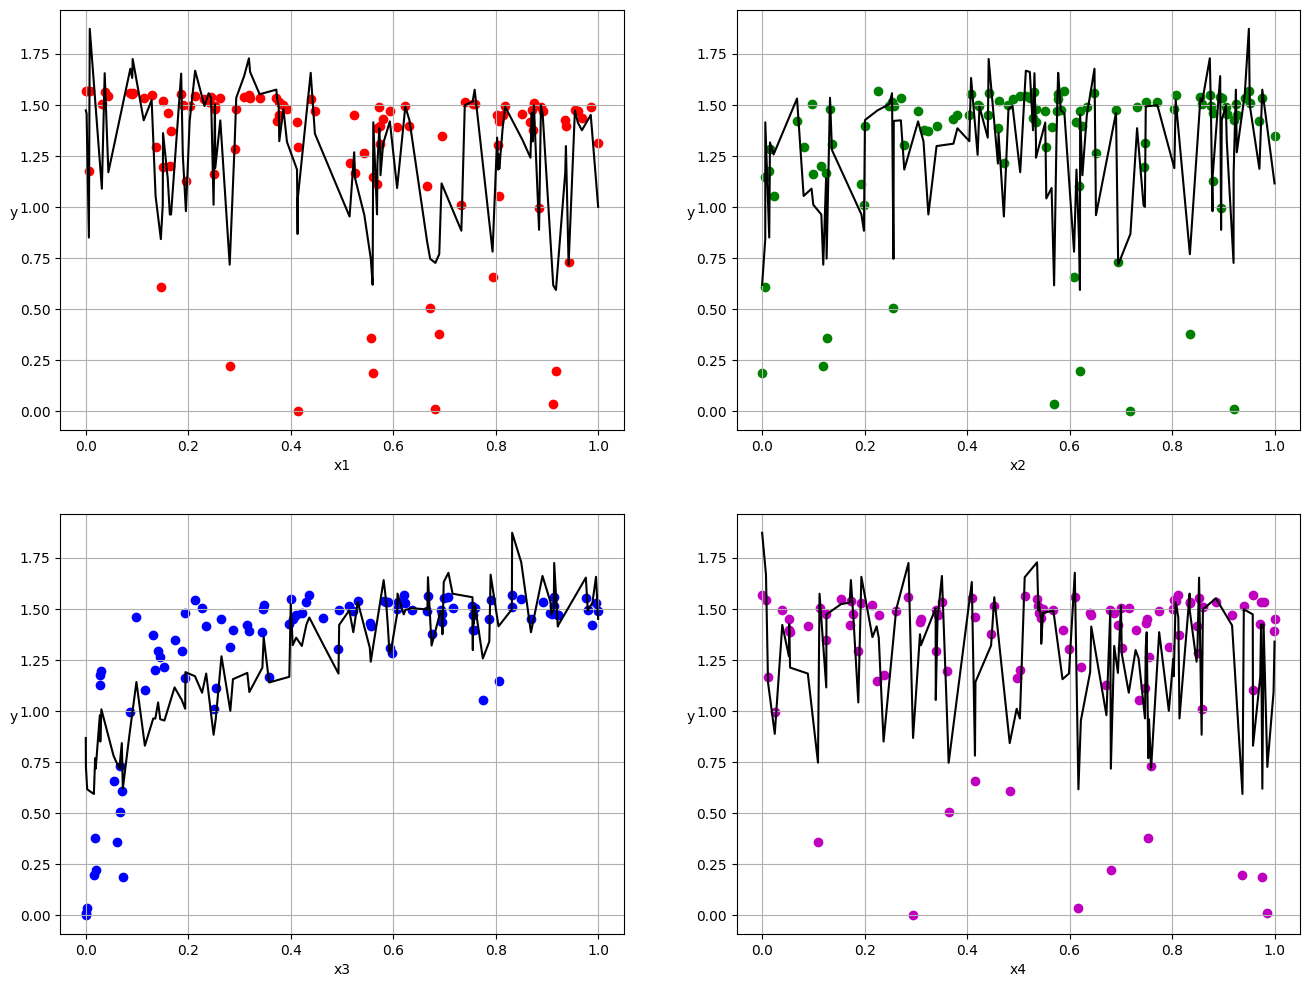

In [24]:
fig=plt.figure(figsize=(16,12))
y_pred=loaded_model_2.predict(X_data_2)
for i in range(n_dim):
  idx=np.argsort(X_data_2[:,i])
  if n_dim%2==1:
    ax=fig.add_subplot(2,n_dim//2+1,i+1)
  else:
    ax=fig.add_subplot(2,n_dim//2,i+1)
  ax.grid()
  ax.set_xlabel(f'x{i+1}')
  ax.set_ylabel('y',rotation=360)
  ax.scatter(X_data_2[:,i],y_data_2,color=colors[i])
  ax.plot(X_data_2[idx,i],y_pred[idx],color='black')
plt.show()

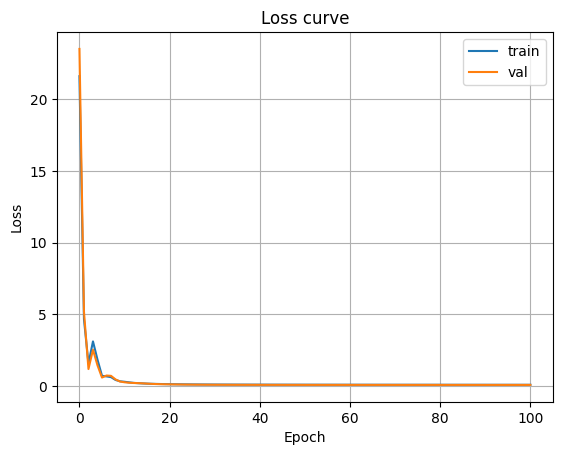

In [25]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title(f'Loss curve')
ax.plot(hist['train_loss'],label='train')
ax.plot(hist['val_loss'],label='val')
ax.legend()
plt.show()